# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient, explicit_answer  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

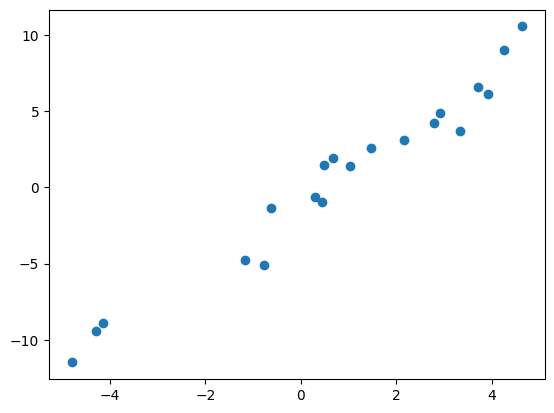

In [2]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
$$h_\theta(x^{(i)})=\theta_0 + \theta_1 . x^{(i)}$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [7]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768486
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [13]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf()

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1) 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], [])
    dot,  = ax1.plot([], [], marker='o')

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 1000x400 with 0 Axes>

# TODO: implement the gradient
1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion.
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.

Then run this cell to test your code: 

In [17]:
print(gradient(np.array([1, 2]), np.array([0, 1]), 0,  1)) # should print (2, 3)
print(gradient(x, y, 0,  1))   # should print (3.569176215534113, -163.58239266243288)
print(gradient(x, y, 2, -1))   # should print (10.94724640649514, -462.08205479805036)

(2, 3)
(3.569176215534111, -163.58239266243288)
(10.94724640649514, -462.0820547980504)


# TODO: implement gradient descent

1. In this cell you will implement gradient descent: 
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update `theta_0` and `theta_1` using the partial derivatives (**Hint**: use the function ``gradient`` in ``gd.py``) 
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

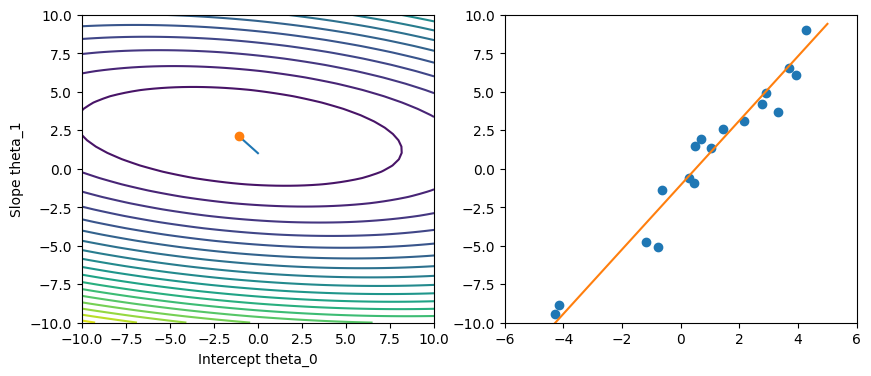

Theta_0 History : 
[0, -0.03569176215534111, -0.3310638384510407, -0.39338262856149603, -0.5651578957477799, -0.6243042092208166, -0.7275082914059386, -0.7750051478520761, -0.8387381696573334, -0.8741158067801971, -0.9143467586957187, -0.939652089780763, -0.9654768987326572, -0.9831513389730081, -0.9999352104883494, -1.01209889510289, -1.0231046769834613, -1.031397122927157, -1.0386596748382155, -1.044278222893618, -1.049091824416601, -1.0528832021324948, -1.0560833799768332, -1.058634854797257, -1.0607668570619784, -1.0624807963490484, -1.0639032030670186, -1.0650531240056915, -1.0660030391551523, -1.0667739105658758, -1.067408708070403, -1.067925188170511, -1.0683495950570927, -1.068695503632964, -1.0689793369467329, -1.0692109473643654, -1.069400808085425, -1.0695558609080125, -1.0696828798598526, -1.0697866686199573, -1.069871653907902, -1.0699411221716308, -1.0699979874739403, -1.0700444817145989, -1.0700825330763142, -1.0701136499534762, -1.0701391127506068, -1.0701599376106896, 

In [20]:
line, dot, hyp = init_plot()

iters = 50  # change as needed

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
###################################################################################
# To Do Start
theta_0 = 0
theta_1 = 1
learning_rate = 0.01 # step size
cost_history = []
theta_0_history = [theta_0]
theta_1_history = [theta_1]
# To Do End

for i in range(0, iters):
    
    #KEEP THIS CODE: this code will display progress of the 
    #algorithm as it runs 
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    #################################################################################
    # TODO: 
    #    - write code to get partial derivatives (hint: call gradient in gd.py) 
    #    - update theta_0 and theta_1 with the partial derivatives and step size 
    #    - save cost function at each step (hint: call a function we gave you above)
    #################################################################################
# To Do Start
    for i in range(iters):
        # Compute Gradient
        d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

        # Update parameters
        theta_0 -= learning_rate * d_theta_0
        theta_1 -= learning_rate * d_theta_1

        # Compute Cost
        cost = cost_function(x, y, theta_0, theta_1)
        cost_history.append(cost)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)

# Results
print("Theta_0 History : ")
print(theta_0_history)
print("Theta_1 History : ")
print(theta_1_history)
print("Cost History : ")
print(cost_history)
print(f"Final theta_0 : {theta_0_history[-1]}, Final theta_1 : {theta_1_history[-1]}")
# To Do End


# TODO: compare gradient descent thetas with explicit thetas
complete ``explicit_answer`` function in ``gd.py`` and print results of both ways.

In [21]:
############################################
# TODO: Write code print both results
# To Do Start
explicit_theta_0, explicit_theta_1 = explicit_answer(x, y)
print(f"Explicit Theta_0 = {explicit_theta_0} and Theta_0 = {theta_0_history[-1]}")
print(f"Explicit Theta_1 = {explicit_theta_1} and Theta_1 = {theta_1_history[-1]}")
# To Do End
###########################################

Explicit Theta_0 = -1.0702535799250916 and Theta_0 = -1.0702535799250912
Explicit Theta_1 = 2.093491126207114 and Theta_1 = 2.093491126207114


# TODO: assess convergence
Plot the iteration (x-axis) vs. cost.

In [ ]:
############################################
# TODO: Write code to plot and display here
###########################################

 Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

** *Write your answer here*. **

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

In [ ]:
############################################
# TODO: Put experimental code here 
###########################################

** *Write your answer here*. **